In [546]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [547]:
df = pd.read_csv('cleandata/movierevenue.csv',index_col = 0)
df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4


In [548]:
corr = df.corr()['production_budget']['worldwide_gross']

print(f" The Correlation Coefficient between Production budget and world wide gross is: {corr}")
# Can see that budget and worldwide gross are relatively highly correlated

 The Correlation Coefficient between Production budget and world wide gross is: 0.7483059765694665


Checking distribution of the data

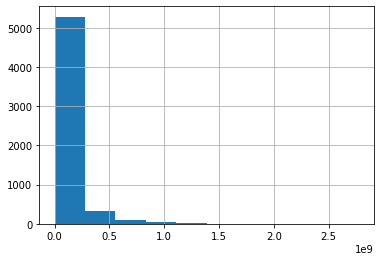

In [549]:
df['worldwide_gross'].hist()

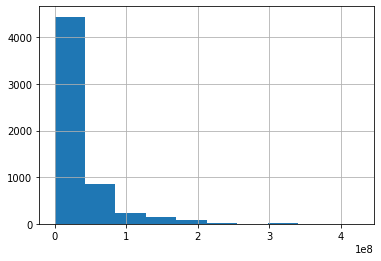

In [550]:
df['production_budget'].hist()

# Investigating How to graph the relationship

Text(0, 0.5, 'Worldwide Gross in Billions of USD')

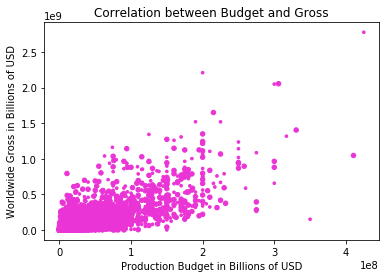

In [551]:
plt.scatter(x = 'production_budget', y = 'worldwide_gross', data= df, marker = 'o', color = "#eb34d5",s = (7,20))
plt.title('Correlation between Budget and Gross')
plt.xticks()
plt.xlabel('Production Budget in Billions of USD')
plt.ylabel('Worldwide Gross in Billions of USD')

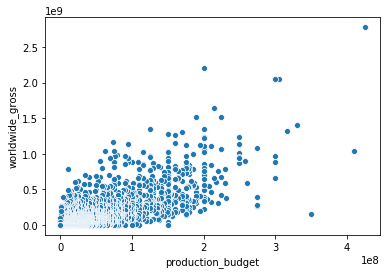

In [414]:
sns.scatterplot(x = 'production_budget', y='worldwide_gross', data = df)

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

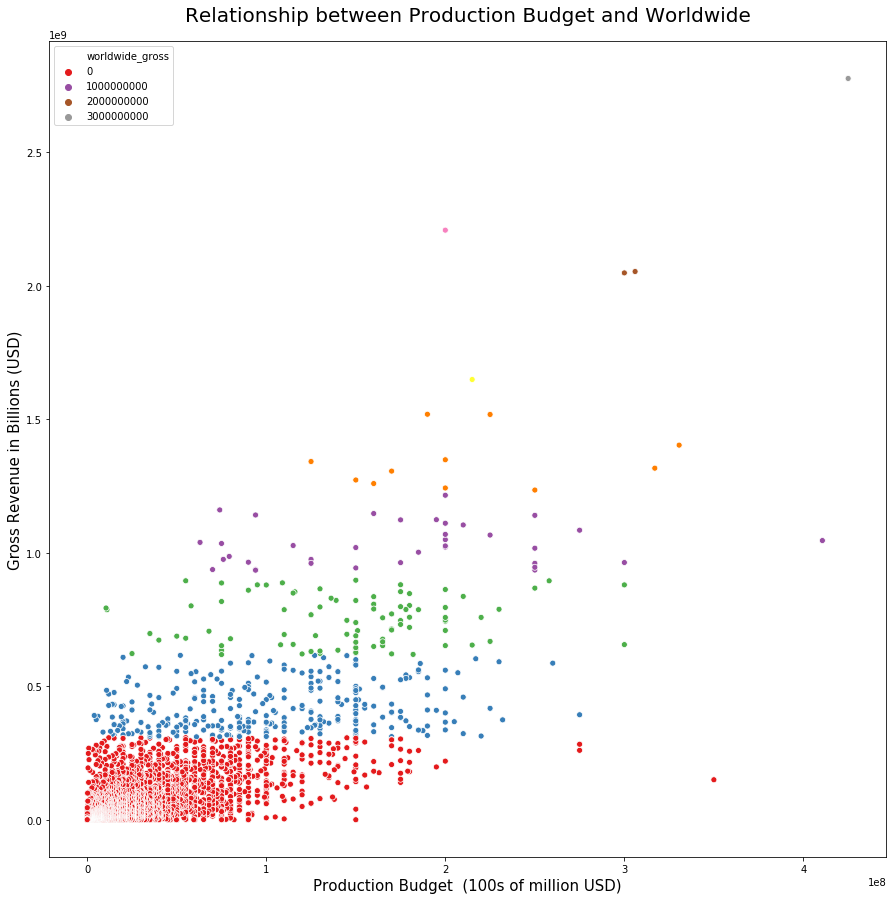

In [500]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
cmap = sns.cubehelix_palette(dark=.3, light=.8, as_cmap=True)
ax = sns.scatterplot(x="production_budget", y="worldwide_gross",hue = "worldwide_gross",
                     data=df, palette="Set1")


ax.set_title("Relationship between Production Budget and Worldwide", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

# Graph showing correlation coefficient and regression

Text(0, 0.5, 'Gross Revenue in Billions (USD)')

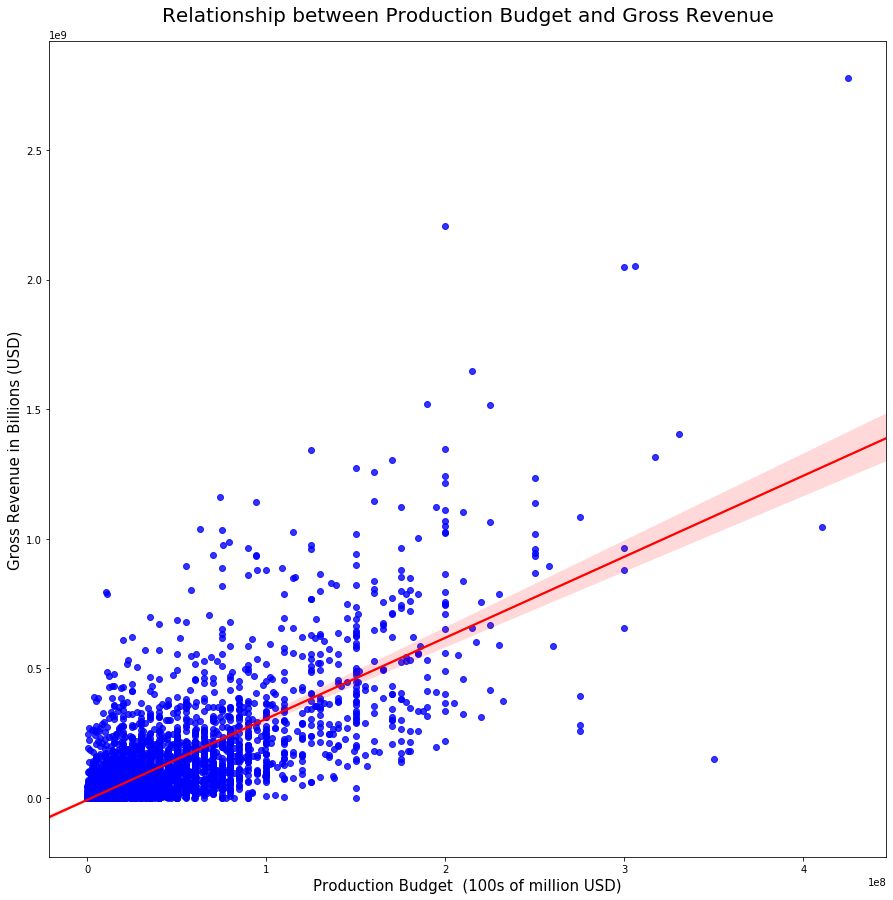

In [627]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(15,15))
ax = sns.regplot(x="production_budget", y="worldwide_gross",data=df, 
                 scatter_kws={"color": "blue"}, line_kws={"color": "red"})


ax.set_title("Relationship between Production Budget and Gross Revenue", size = 20, pad = 20)
ax.set_xlabel("Production Budget  (100s of million USD)", size = 15)
ax.set_ylabel("Gross Revenue in Billions (USD)", size = 15)

# After looking through the data, I found that some movie's had the same name - to avoid the different movies being included when grouping by movie name I will create a new column that combines movie name and release data

In [553]:
df['movie_check'] = df['movie']+' '+df['release_date']

#  Highest Grossing Movies of all time

In [554]:
top10 = df.groupby('movie_check')['worldwide_gross'].sum().sort_values(ascending = False )[:20]
top10.sort_values()

movie_check
The Lord of the Rings: The Return of the King 2003-12-17    1141403341
Aquaman 2018-12-21                                          1146894640
Minions 2015-07-10                                          1160336173
Iron Man 3 2013-05-03                                       1215392272
The Fate of the Furious 2017-04-14                          1234846267
Incredibles 2 2018-06-15                                    1242520711
Beauty and the Beast 2017-03-17                             1259199706
Frozen 2013-11-22                                           1272469910
Jurassic World: Fallen Kingdom 2018-06-22                   1305772799
Star Wars Ep. VIII: The Last Jedi 2017-12-15                1316721747
Harry Potter and the Deathly Hallows: Part II 2011-07-15    1341693157
Black Panther 2018-02-16                                    1348258224
Avengers: Age of Ultron 2015-05-01                          1403013963
The Avengers 2012-05-04                                     15179

(array([0.0e+00, 5.0e+08, 1.0e+09, 1.5e+09, 2.0e+09, 2.5e+09, 3.0e+09]),
 <a list of 7 Text xticklabel objects>)

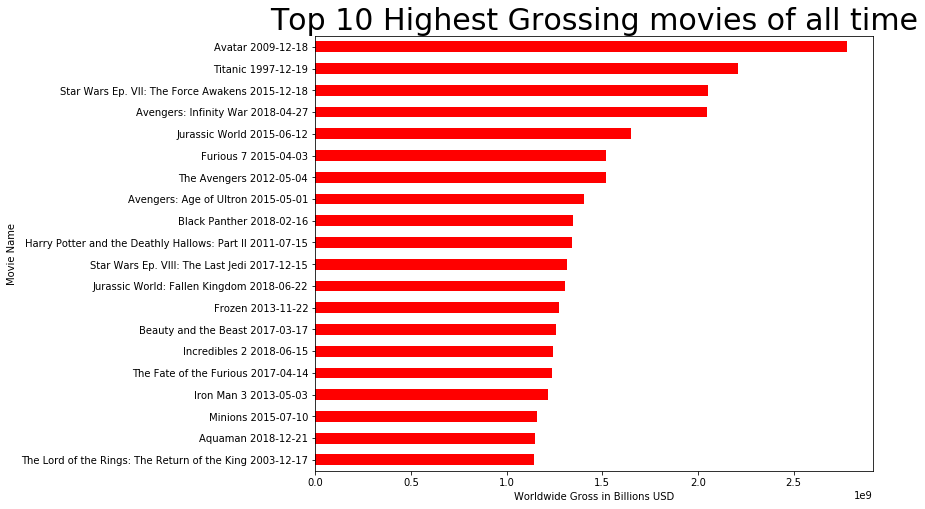

In [557]:
top10.sort_values().plot(kind='barh', figsize=(10,8), color = 'red')
plt.ylabel('Movie Name')
plt.xlabel('Worldwide Gross in Billions USD')
plt.title('Top 10 Highest Grossing movies of all time', size = 30);
plt.xticks()

# Make a DataFrame for the top 20 movies by gross

In [558]:
top20moviesgross = df.sort_values(by = 'worldwide_gross', ascending = False)[:20]

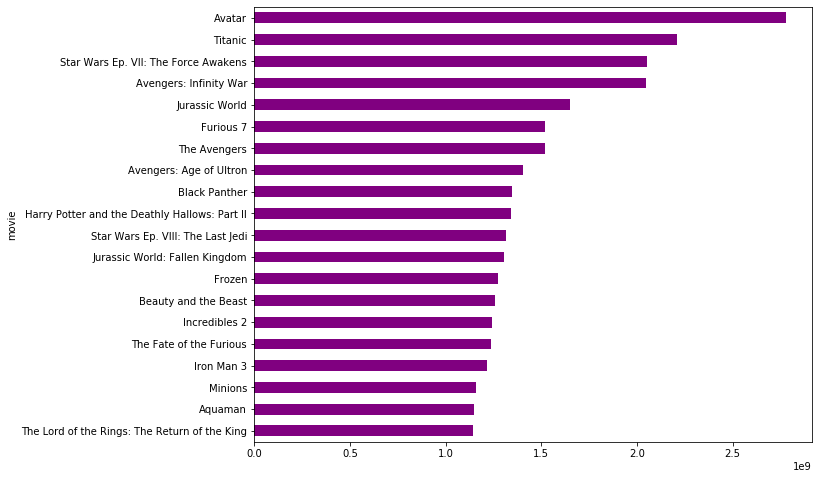

In [559]:
top20moviesgross.groupby('movie')['worldwide_gross'].sum().sort_values(ascending = True)[:20].plot(kind = 'barh', figsize=(10,8), color = 'purple')


In [560]:
top20moviesgross.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,12,10.041042,0.909429,2008208395,4,Titanic 1997-12-19
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,12,5.710167,0.850972,1747311220,4,Star Wars Ep. VII: The Force Awakens 2015-12-18
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,2,0,Friday,4,5.827114,0.853525,1748134200,4,Avengers: Infinity War 2018-04-27
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,5,0,Friday,6,6.669092,0.869606,1433854864,4,Jurassic World 2015-06-12


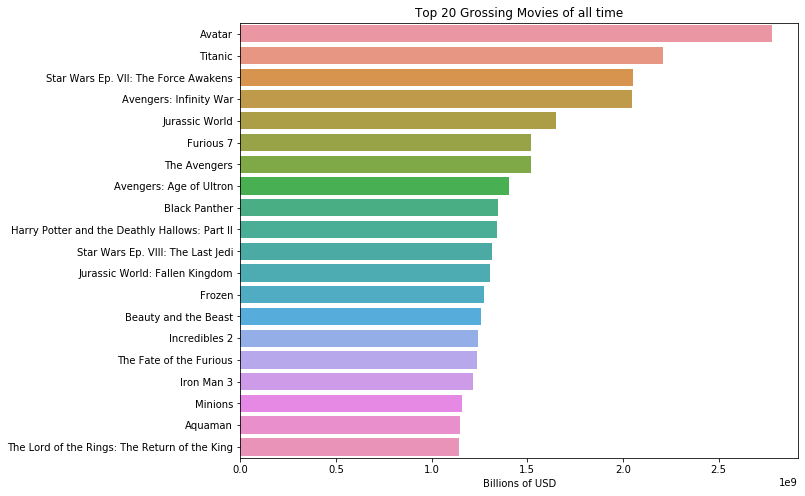

In [625]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax = sns.barplot(y='movie', x= "worldwide_gross",data=top20moviesgross)
ax.set_title("Top 20 Grossing Movies of all time")
ax.set_xlabel("Billions of USD")
ax.set_ylabel("");

# Make a DataFrame for the top 20 movies by Net


In [569]:
top20moviesnet = df.sort_values(by = 'netprofit', ascending = False)[:20]
top20moviesnet.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,12,10.041042,0.909429,2008208395,4,Titanic 1997-12-19
6,7,2018-04-27,Avengers: Infinity War,300000000,678815482,2048134200,2018,2,0,Friday,4,5.827114,0.853525,1748134200,4,Avengers: Infinity War 2018-04-27
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,12,5.710167,0.850972,1747311220,4,Star Wars Ep. VII: The Force Awakens 2015-12-18
33,34,2015-06-12,Jurassic World,215000000,652270625,1648854864,2015,5,0,Friday,6,6.669092,0.869606,1433854864,4,Jurassic World 2015-06-12


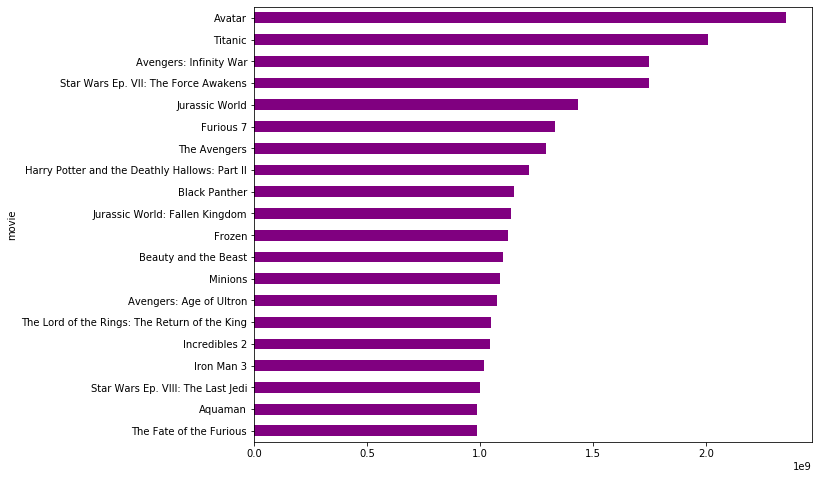

In [570]:
top20moviesnet.groupby('movie')['netprofit'].sum().sort_values(ascending = True).plot(kind = 'barh', figsize=(10,8), color = 'purple')


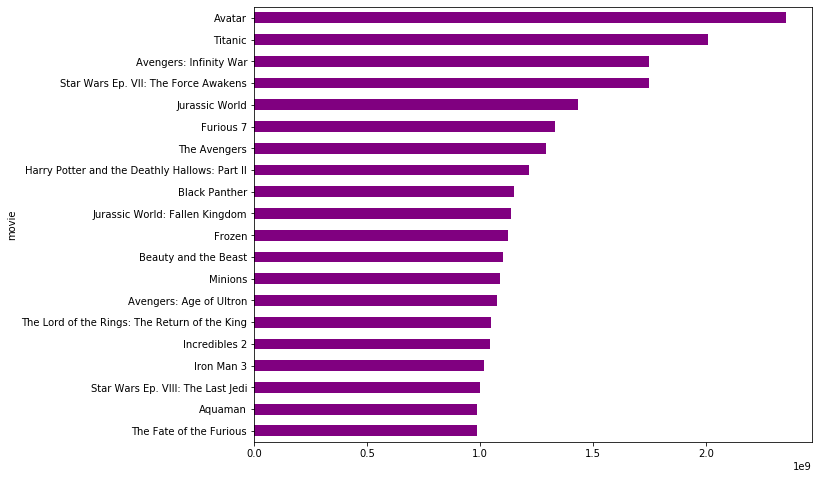

In [575]:
top20net = top20moviesnet.groupby('movie')['netprofit'].sum().sort_values(ascending = True)
top20net.plot(kind = 'barh', figsize=(10,8), color = 'purple')

In [573]:
top20net

movie
The Fate of the Furious                           984846267
Aquaman                                           986894640
Star Wars Ep. VIII: The Last Jedi                 999721747
Iron Man 3                                       1015392272
Incredibles 2                                    1042520711
The Lord of the Rings: The Return of the King    1047403341
Avengers: Age of Ultron                          1072413963
Minions                                          1086336173
Beauty and the Beast                             1099199706
Frozen                                           1122469910
Jurassic World: Fallen Kingdom                   1135772799
Black Panther                                    1148258224
Harry Potter and the Deathly Hallows: Part II    1216693157
The Avengers                                     1292935897
Furious 7                                        1328722794
Jurassic World                                   1433854864
Star Wars Ep. VII: The Force Awake

Text(0, 0.5, '')

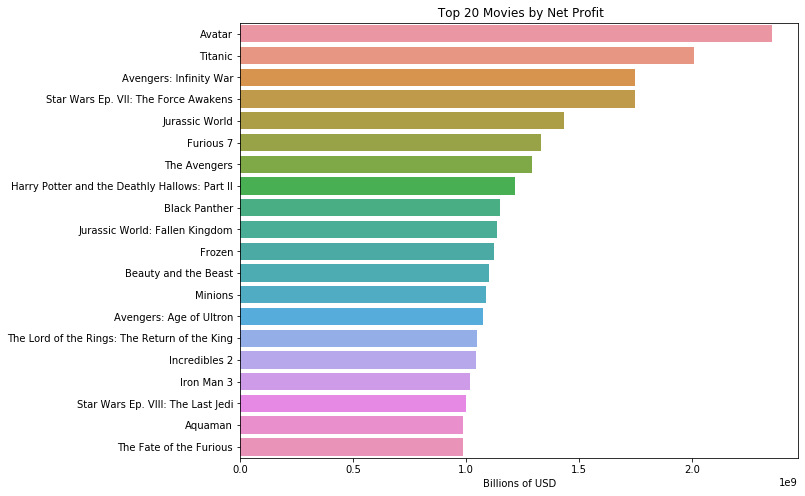

In [624]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))

ax = sns.barplot(y='movie', x= "netprofit",data=top20moviesnet)
ax.set_title(" Top 20 Movies by Net Profit")
ax.set_xlabel("Billions of USD")
ax.set_ylabel("")

# Exploring How Budgets and Revenues have changed over the decades

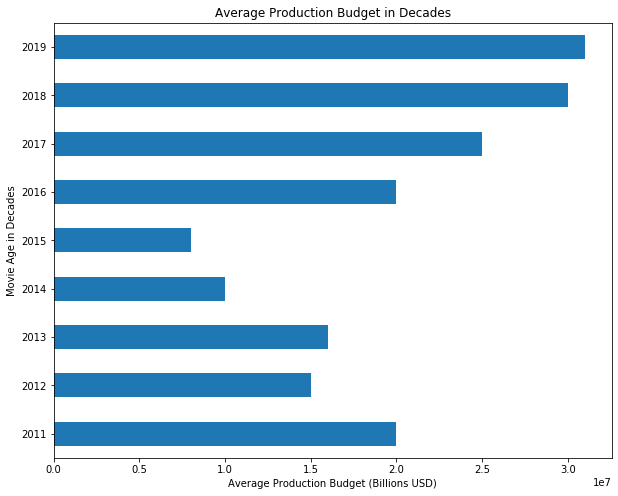

In [674]:
to_plot = df2010.groupby('year_released')['production_budget'].median()
to_plot.plot(kind='barh', figsize=(10,8))
plt.ylabel('Movie Age in Decades')
plt.xlabel('Average Production Budget (Billions USD)')
plt.title('Average Production Budget in Decades');

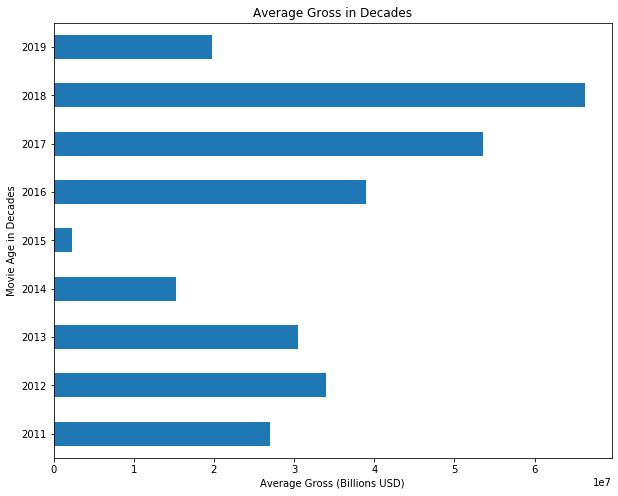

In [675]:
to_plot2 = df2010.groupby('year_released')['worldwide_gross'].median()
to_plot2.plot(kind='barh', figsize=(10,8))
plt.ylabel('Movie Age in Decades')
plt.xlabel('Average Gross (Billions USD)')
plt.title('Average Gross in Decades');

In [657]:
years = df2010.groupby('year_released')['worldwide_gross'].median()


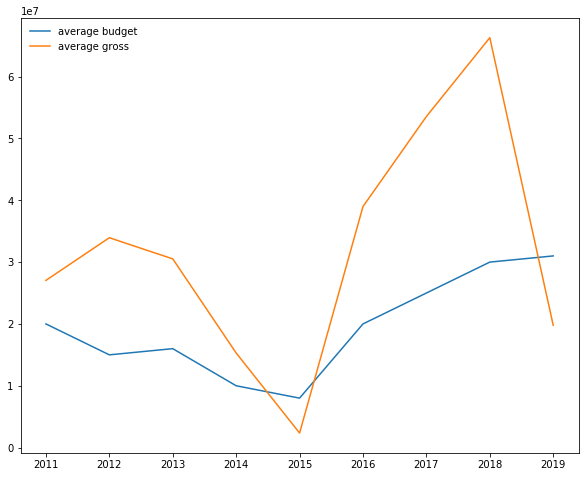

In [684]:
new_figure = plt.figure(figsize = (10,8))

# Add a subplot to the figure - a new axes
ax = new_figure.add_subplot(111)

ax.plot(to_plot, label = 'average budget')
ax.plot(to_plot2, label = 'average gross')
ax.legend(loc='upper left', frameon=False)




# Group data set by Day Release

In [581]:
dayrelease = df.groupby('decades')['worldwide_gross'].median()[:5]

In [582]:
daydf = pd.DataFrame(dayrelease)

In [583]:
daydf.reindex

<bound method DataFrame.reindex of          worldwide_gross
decades                 
0             28719068.5
1             29202213.0
2             30384900.0
3             26496790.0
4             26572439.0>

In [584]:
daydf

,worldwide_gross
decades,
0,28719068.5
1,29202213.0
2,30384900.0
3,26496790.0
4,26572439.0


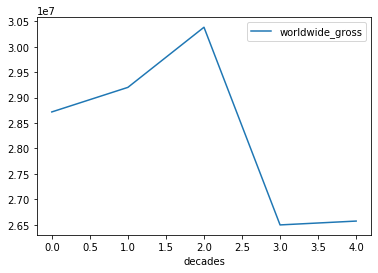

In [585]:
sns.lineplot(data = daydf)

# Creating a data frame for the 4 decades we will analyse

In [587]:
df4decades = df.loc[(df['decades']== 0) |(df['decades']== 1) | (df['decades']== 2)| (df['decades']== 3)]
df4decades.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15


In [588]:
df4decades.loc[(df4decades['decades'] == 0), 'decades'] = '2010s'
df4decades.loc[(df4decades['decades'] == 1), 'decades'] = '2000s'
df4decades.loc[(df4decades['decades'] == 2), 'decades'] = '1990s'
df4decades.loc[(df4decades['decades'] == 3), 'decades'] = '1980s'




/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [589]:
df4decades.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,2000s,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,2010s,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,2010s,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,2010s,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,2010s,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15


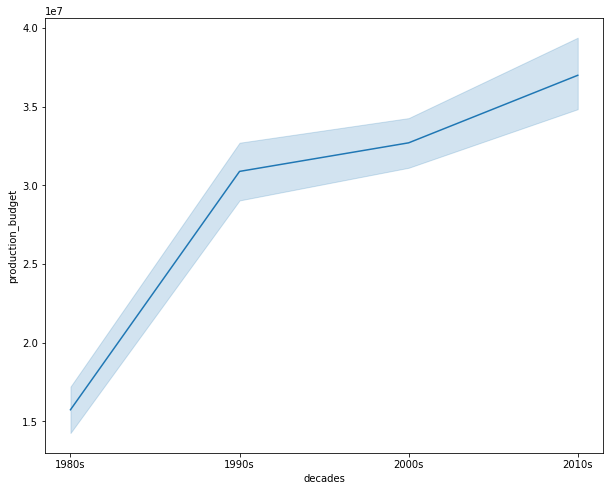

In [595]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.lineplot(x='decades',y='production_budget',data=df4decades)

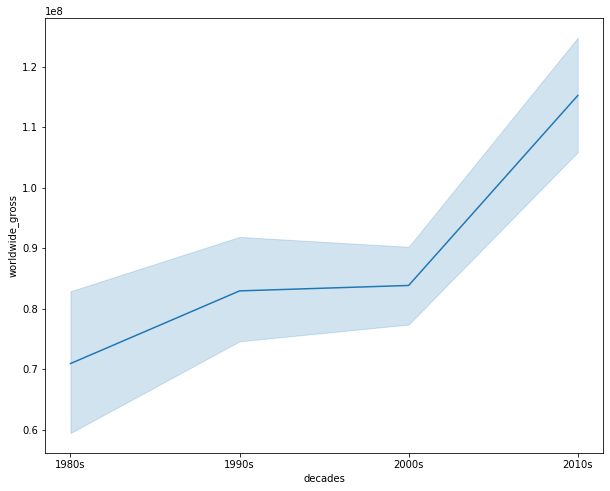

In [594]:
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(10,8))
sns.lineplot(x='decades',y='worldwide_gross',data=df4decades)

In [596]:
# Storing Data frame to use in other questions

In [597]:
%store df4decades


Stored 'df4decades' (DataFrame)


In [598]:
print(f"The average Production budget in 1980s is: {df1980['production_budget'].median()}")
print(f"The average Production budget in 1990s is: {df1990['production_budget'].median()}")
print(f"The average Production budget in 2000s is: {df2000['production_budget'].median()}")
print(f"The average Production budget in 2010s is: {df2010['production_budget'].median()}")


The average Production budget in 1980s is: 12000000.0
The average Production budget in 1990s is: 22000000.0
The average Production budget in 2000s is: 20000000.0
The average Production budget in 2010s is: 17000000.0


In [599]:
print(f"The average Worldwide Gross in 1980s is: {df1980['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 1990s is: {df1990['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 2000s is: {df2000['worldwide_gross'].median()}")
print(f"The average Worldwide Gross in 2010s is: {df2010['worldwide_gross'].median()}")


The average Worldwide Gross in 1980s is: 26496790.0
The average Worldwide Gross in 1990s is: 30384900.0
The average Worldwide Gross in 2000s is: 29202213.0
The average Worldwide Gross in 2010s is: 29204379.0


In [600]:
print(f"The average Worldwide Gross in 1980s is: {df1980['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 1990s is: {df1990['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 2000s is: {df2000['worldwide_gross'].sum()}")
print(f"The average Worldwide Gross in 2010s is: {df2010['worldwide_gross'].sum()}")


The average Worldwide Gross in 1980s is: 21414092749
The average Worldwide Gross in 1990s is: 81434489314
The average Worldwide Gross in 2000s is: 190955329531
The average Worldwide Gross in 2010s is: 221262113807


# Creating DataFrames for each decade I will analyse

In [605]:
df2010 = df.loc[(df['decades']==0) & (df['year_released']!= 2020)]

In [618]:
df2010.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,9,0,Friday,5,1.546673,0.607331,635063875,4,Pirates of the Caribbean: On Stranger Tides 20...
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,1,0,Friday,6,-0.572108,-1.337036,-200237650,4,Dark Phoenix 2019-06-07
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5,0,Friday,5,3.243841,0.764364,1072413963,4,Avengers: Age of Ultron 2015-05-01
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,3,0,Friday,12,3.153696,0.759251,999721747,4,Star Wars Ep. VIII: The Last Jedi 2017-12-15
5,6,2015-12-18,Star Wars Ep. VII: The Force Awakens,306000000,936662225,2053311220,2015,5,0,Friday,12,5.710167,0.850972,1747311220,4,Star Wars Ep. VII: The Force Awakens 2015-12-18


In [607]:
df2000 = df.loc[(df['decades']==1)]

In [617]:
df2000.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,11,1,Friday,12,5.532577,0.846921,2351345279,4,Avatar 2009-12-18
7,8,2007-05-24,Pirates of the Caribbean: At Worldâs End,300000000,309420425,963420425,2007,13,1,Thursday,5,2.211401,0.688609,663420425,3,Pirates of the Caribbean: At Worldâs End 200...
14,15,2010-11-24,Tangled,260000000,200821936,586477240,2010,10,1,Wednesday,11,1.255682,0.556675,326477240,2,Tangled 2010-11-24
15,16,2007-05-04,Spider-Man 3,258000000,336530303,894860230,2007,13,1,Friday,5,2.468451,0.711687,636860230,4,Spider-Man 3 2007-05-04
19,20,2009-07-15,Harry Potter and the Half-Blood Prince,250000000,302089278,935213767,2009,11,1,Wednesday,7,2.740855,0.732681,685213767,2,Harry Potter and the Half-Blood Prince 2009-07-15


In [610]:
df1990 = df.loc[(df['decades']==2)]

In [611]:
df1990.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
42,43,1997-12-19,Titanic,200000000,659363944,2208208395,1997,23,2,Friday,12,10.041042,0.909429,2008208395,4,Titanic 1997-12-19
106,7,1999-06-30,Wild Wild West,175000000,113805681,221229335,1999,21,2,Wednesday,6,0.264168,0.208966,46229335,2,Wild Wild West 1999-06-30
109,10,1995-07-28,Waterworld,175000000,88246220,264246220,1995,25,2,Friday,7,0.509978,0.337739,89246220,4,Waterworld 1995-07-28
199,100,1999-06-16,Tarzan,145000000,171091819,448191819,1999,21,2,Wednesday,6,2.090978,0.676478,303191819,2,Tarzan 1999-06-16
207,8,1998-07-01,Armageddon,140000000,201578182,554600000,1998,22,2,Wednesday,7,2.961429,0.747566,414600000,2,Armageddon 1998-07-01


In [613]:
df1980 =df.loc[(df['decades']==3)]

In [614]:
df1980.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,year_released,age,decades,day,month,markup,profitmargin,netprofit,daynumber,movie_check
695,96,1988-06-22,Who Framed Roger Rabbit?,70000000,154112492,351500000,1988,32,3,Wednesday,6,4.021429,0.800853,281500000,2,Who Framed Roger Rabbit? 1988-06-22
702,3,1990-07-03,Die Hard 2,70000000,117323878,239814025,1990,30,3,Tuesday,7,2.425915,0.708107,169814025,1,Die Hard 2 1990-07-03
722,23,1989-08-09,The Abyss,70000000,54243125,54243125,1989,31,3,Wednesday,8,-0.225098,-0.290486,-15756875,2,The Abyss 1989-08-09
779,80,1990-06-01,Total Recall,65000000,119394839,261400000,1990,30,3,Friday,6,3.021538,0.751339,196400000,4,Total Recall 1990-06-01
864,65,1990-06-27,Days of Thunder,60000000,82670733,157670733,1990,30,3,Wednesday,6,1.627846,0.619460,97670733,2,Days of Thunder 1990-06-27


In [620]:
# Checking Correlation

In [615]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.36036976366148676
Correlation in 1990s is: 0.581093385584478
Correlation in 2000s is: 0.7579313686666304
Correlation in 2010s is: 0.7973745361056639


In [619]:
# Saving DFs

In [616]:
%store df1980
%store df1990
%store df2000
%store df2010

Stored 'df1980' (DataFrame)
Stored 'df1990' (DataFrame)
Stored 'df2000' (DataFrame)
Stored 'df2010' (DataFrame)


It is clear to see the trend in the correlation between worldwide gross and production budget has become more prominant over the past 4 decades

In [464]:
df.corr()['worldwide_gross']['production_budget']

0.7483059765694665

In [465]:
print(df2010['worldwide_gross'].agg(['mean','median']))
print(df2010['production_budget'].agg(['mean','median']))


mean      1.154210e+08
median    2.920438e+07
Name: worldwide_gross, dtype: float64
mean      3.689663e+07
median    1.700000e+07
Name: production_budget, dtype: float64


In [466]:
print(df2000['worldwide_gross'].agg(['mean','median']))
print(df2000['production_budget'].agg(['mean','median']))


mean      8.382587e+07
median    2.920221e+07
Name: worldwide_gross, dtype: float64
mean      3.269712e+07
median    2.000000e+07
Name: production_budget, dtype: float64


In [467]:
print(df1990['worldwide_gross'].agg(['mean','median']))
print(df1990['production_budget'].agg(['mean','median']))


mean      8.292718e+07
median    3.038490e+07
Name: worldwide_gross, dtype: float64
mean      3.088266e+07
median    2.200000e+07
Name: production_budget, dtype: float64


In [468]:
print(df1980['worldwide_gross'].agg(['mean','median']))
print(df1980['production_budget'].agg(['mean','median']))


mean      7.090759e+07
median    2.649679e+07
Name: worldwide_gross, dtype: float64
mean      1.574355e+07
median    1.200000e+07
Name: production_budget, dtype: float64


In [469]:
df2010.groupby('year_released')

In [470]:
dfyears2010 = df.loc[(df['decades']==0) & (df['year_released'] != 2020)]

In [471]:
%store dfyears2010

Stored 'dfyears2010' (DataFrame)


In [472]:
y2015 = df.loc[df['year_released']==2015]

In [473]:
y2015['worldwide_gross'].median()

2355077.5

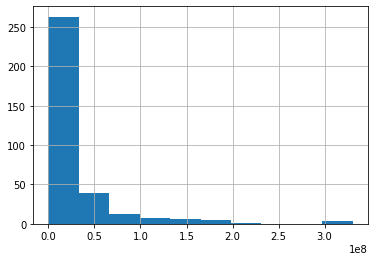

In [474]:
y2015['production_budget'].hist()

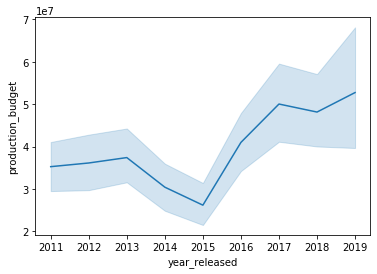

In [475]:
sns.lineplot(x = 'year_released', y='production_budget',data=dfyears2010)

# Different Scatter Plot's to represent the correlation

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

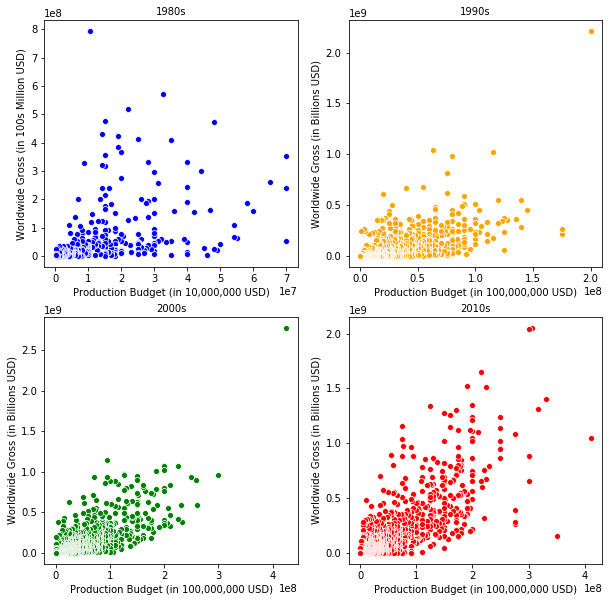

In [545]:
fig, axes=plt.subplots(nrows=2, ncols=2, figsize=(10,10))
ax1 = axes[0][0]
ax2 = axes[0][1]
ax3 = axes[1][0]
ax4 = axes[1][1]
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1,color = 'blue')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2, color = 'orange')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3, color = 'green')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4, color = 'red')

ax1.set_title('1980s')
ax2.set_title('1990s')
ax3.set_title('2000s')
ax4.set_title('2010s')



ax1.set_title('1980s', size = 10, pad = 5)
ax2.set_title('1990s', size = 10, pad = 5)
ax3.set_title('2000s', size = 10, pad = 5)
ax4.set_title('2010s', size = 10, pad = 5)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)')
ax2.set_xlabel('Production Budget (in 100,000,000 USD)')
ax3.set_xlabel('Production Budget (in 100,000,000 USD)')
ax4.set_xlabel('Production Budget (in 100,000,000 USD)')

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)')
ax2.set_ylabel('Worldwide Gross (in Billions USD)')
ax3.set_ylabel('Worldwide Gross (in Billions USD)')
ax4.set_ylabel('Worldwide Gross (in Billions USD)')

In [503]:
df1980['production_budget'].max()

70000000

# Regression plot

Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

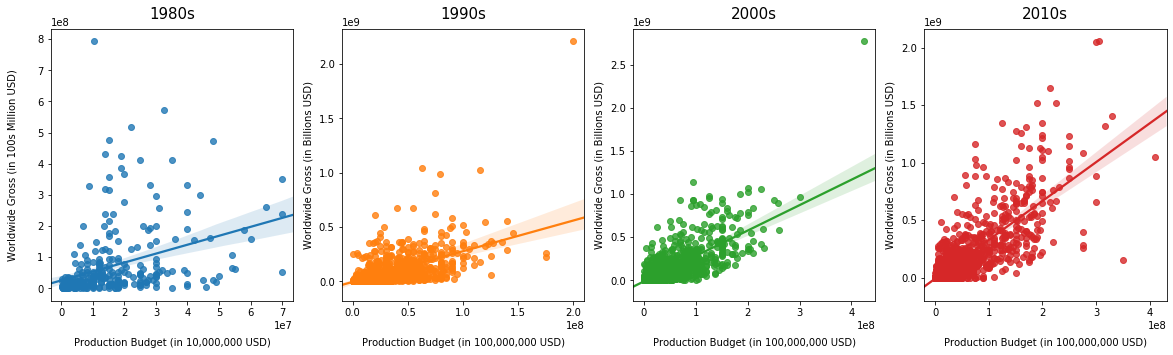

In [623]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3)
sns.regplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4)

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)


In [482]:
print(f"Correlation in 1980s is: {df1980.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 1990s is: {df1990.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2000s is: {df2000.corr()['worldwide_gross']['production_budget']}")
print(f"Correlation in 2010s is: {df2010.corr()['worldwide_gross']['production_budget']}")

Correlation in 1980s is: 0.36036976366148676
Correlation in 1990s is: 0.581093385584478
Correlation in 2000s is: 0.7579313686666304
Correlation in 2010s is: 0.7973745361056639


Text(0, 0.5, 'Worldwide Gross (in Billions USD)')

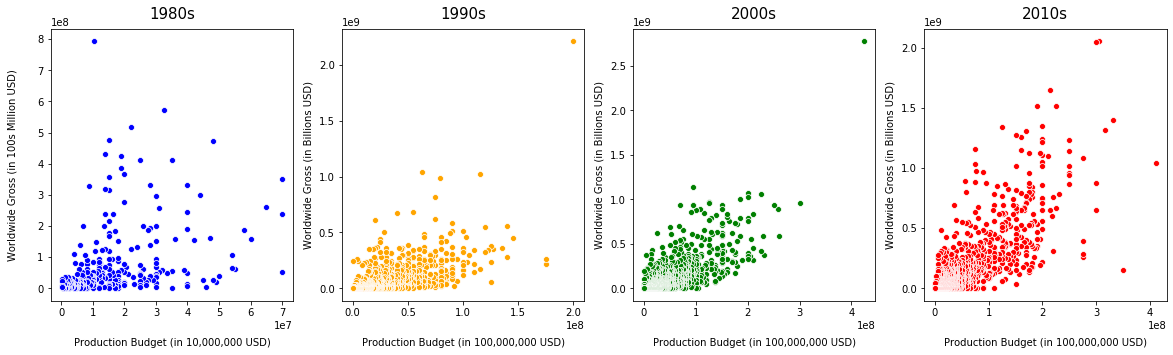

In [621]:
new_figure = plt.figure(figsize=(20,5))

# Add a subplot to the figure - a new axes
ax1 = new_figure.add_subplot(141)
ax2 = new_figure.add_subplot(142)
ax3 = new_figure.add_subplot(143)
ax4 = new_figure.add_subplot(144)

sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1980, ax = ax1,color = 'blue')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df1990, ax = ax2, color = 'orange')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2000, ax = ax3, color = 'green')
sns.scatterplot(x = 'production_budget',y = 'worldwide_gross',data=df2010, ax = ax4, color = 'red')

ax1.set_title('1980s', size = 15, pad = 10)
ax2.set_title('1990s', size = 15, pad = 10)
ax3.set_title('2000s', size = 15, pad = 10)
ax4.set_title('2010s', size = 15, pad = 10)

ax1.set_xlabel('Production Budget (in 10,000,000 USD)',labelpad = 20)
ax2.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax3.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)
ax4.set_xlabel('Production Budget (in 100,000,000 USD)',labelpad = 20)

ax1.set_ylabel('Worldwide Gross (in 100s Million USD)',labelpad = 20)
ax2.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax3.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
ax4.set_ylabel('Worldwide Gross (in Billions USD)',labelpad = 5)
